Izlazni CSV fajl je uspešno kreiran


/tmp/ipykernel_1210809/3397375241.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Varijante", y="Procenat", data=df_izlaz, palette="viridis")


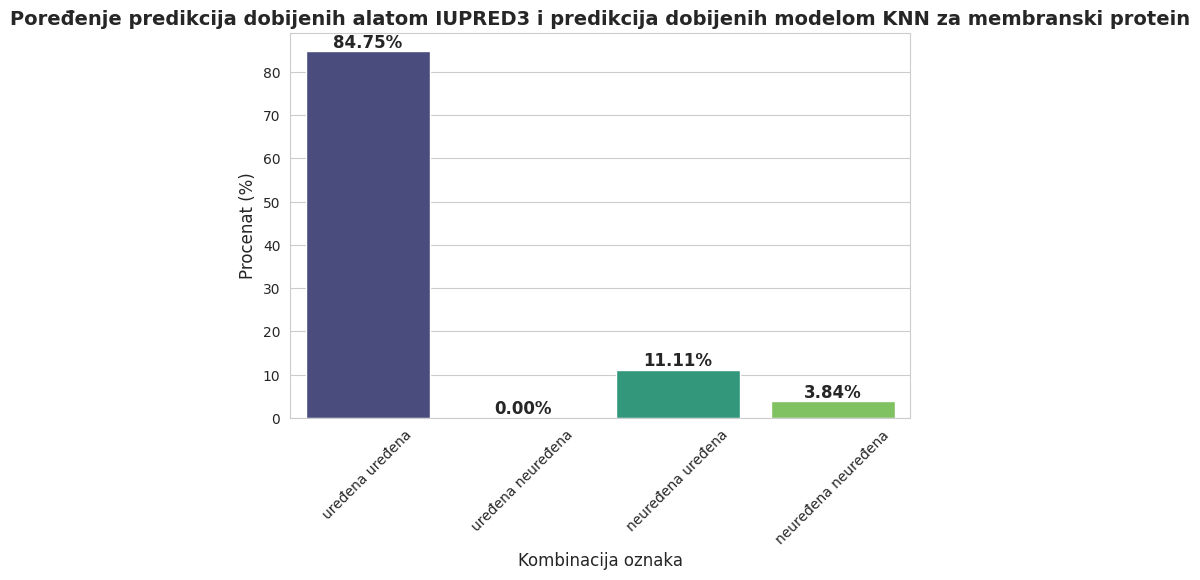

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Učitaj ulazni CSV fajl
df = pd.read_csv("Membranski protein/IUPRED3_KNN_predikcije_YP_138522.1 |matrix protein30-100.csv")

# Broj svih instanci
total = len(df)

# Broj instanci po kategorijama
counts = {
    "uređena uređena": len(df[(df["IUPRED3 oznaka"] == "uređena") & (df["KNN Oznaka"] == "uređena")]),
    "uređena neuređena": len(df[(df["IUPRED3 oznaka"] == "uređena") & (df["KNN Oznaka"] == "neuređena")]),
    "neuređena uređena": len(df[(df["IUPRED3 oznaka"] == "neuređena") & (df["KNN Oznaka"] == "uređena")]),
    "neuređena neuređena": len(df[(df["IUPRED3 oznaka"] == "neuređena") & (df["KNN Oznaka"] == "neuređena")])
}

# Izračunaj procente i zaokruži na 4 decimale
procenti = {varijanta: round((broj / total) * 100, 4) for varijanta, broj in counts.items()}

# Kreiraj izlazni DataFrame
df_izlaz = pd.DataFrame({
    "Varijante": list(procenti.keys()),
    "Procenat": list(procenti.values())
})

# Snimi izlazni CSV fajl
df_izlaz.to_csv("Membranski protein/procenti_za_KNN.csv", index=False)

print("Izlazni CSV fajl je uspešno kreiran")

# Podesi stil grafika
sns.set_style("whitegrid")

# Kreiraj stubičasti grafikon
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Varijante", y="Procenat", data=df_izlaz, palette="viridis")

# Dodaj oznake na vrh stubaca
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight="bold")

# Dodaj naslove i oznake
plt.xlabel("Kombinacija oznaka", fontsize=12)
plt.ylabel("Procenat (%)", fontsize=12)
plt.title("Poređenje predikcija dobijenih alatom IUPRED3 i predikcija dobijenih modelom KNN za membranski protein", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)

# Prikaži grafikon
plt.show()
